In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score

In [2]:
traindata = pd.read_csv("./fraudTrain.csv")
testdata = pd.read_csv("./fraudTest.csv")

In [3]:
traindata.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
testdata.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
traindata.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [6]:
traindata.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
data_1 = traindata.copy()

In [8]:
traindata['is_fraud'].value_counts()

0    1042569
1       6006
Name: is_fraud, dtype: int64

<AxesSubplot: xlabel='is_fraud', ylabel='count'>

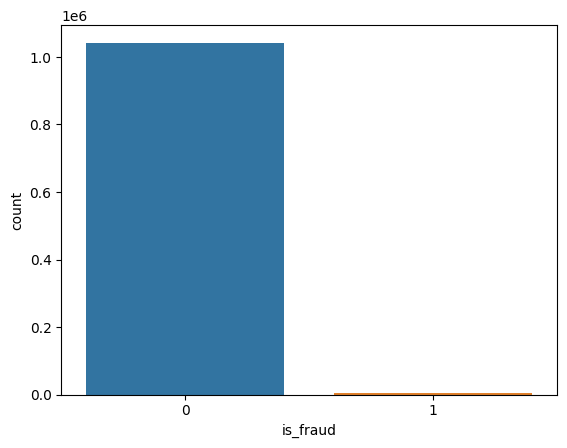

In [9]:
sns.countplot(x='is_fraud', data=traindata)

In [10]:
x = traindata[['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'city', 'state', 'lat', 'long', 'merch_lat', 'merch_long']].copy()
y = traindata['is_fraud'].copy()
x
# y

,cc_num,merchant,category,amt,first,last,city,state,lat,long,merch_lat,merch_long
0,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,Moravian Falls,NC,36.0788,-81.1781,36.011293,-82.048315
1,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,Orient,WA,48.8878,-118.2105,49.159047,-118.186462
2,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,Malad City,ID,42.1808,-112.2620,43.150704,-112.154481
3,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,Boulder,MT,46.2306,-112.1138,47.034331,-112.561071
4,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,Doe Hill,VA,38.4207,-79.4629,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6.011980e+15,fraud_Fadel Inc,health_fitness,77.00,Haley,Wagner,Annapolis,MD,39.0305,-76.5515,38.779464,-76.317042
1048571,4.839040e+15,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,Meredith,Campbell,Hedrick,IA,41.1826,-92.3097,41.400318,-92.726724
1048572,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,Louisville,KY,38.2507,-85.7476,37.293339,-84.798122
1048573,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,Julia,Bell,West Sayville,NY,40.7320,-73.1000,39.773077,-72.213209


In [11]:
y.value_counts()

0    1042569
1       6006
Name: is_fraud, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [13]:
le = LabelEncoder()
x['category_encoded'] =  le.fit_transform(x['category']).copy()
x['merchant_encoded'] = le.fit_transform(x['merchant']).copy()
x['first_encoded'] = le.fit_transform(x['first']).copy()
x['last_encoded'] = le.fit_transform(x['last'])
x['city_encoded'] = le.fit_transform(x['city'])
x['state_encoded'] = le.fit_transform(x['state'])

x

,cc_num,merchant,category,amt,first,last,city,state,lat,long,merch_lat,merch_long,category_encoded,merchant_encoded,first_encoded,last_encoded,city_encoded,state_encoded
0,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,Moravian Falls,NC,36.0788,-81.1781,36.011293,-82.048315,8,514,160,18,517,27
1,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,Orient,WA,48.8878,-118.2105,49.159047,-118.186462,4,241,305,157,600,47
2,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,Malad City,ID,42.1808,-112.2620,43.150704,-112.154481,0,390,113,380,459,13
3,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,Boulder,MT,46.2306,-112.1138,47.034331,-112.561071,2,360,161,461,83,26
4,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,Doe Hill,VA,38.4207,-79.4629,38.674999,-78.632459,9,297,332,149,212,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6.011980e+15,fraud_Fadel Inc,health_fitness,77.00,Haley,Wagner,Annapolis,MD,39.0305,-76.5515,38.779464,-76.317042,5,166,138,439,23,20
1048571,4.839040e+15,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,Meredith,Campbell,Hedrick,IA,41.1826,-92.3097,41.400318,-92.726724,9,110,239,58,331,12
1048572,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,Louisville,KY,38.2507,-85.7476,37.293339,-84.798122,6,456,308,289,450,17
1048573,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,Julia,Bell,West Sayville,NY,40.7320,-73.1000,39.773077,-72.213209,5,620,182,23,850,34


In [14]:
train_x = x.drop(columns=['merchant', 'category', 'city', 'state', 'first', 'last'], axis=1).copy()
train_y = y.copy()

In [15]:
train_x

,cc_num,amt,lat,long,merch_lat,merch_long,category_encoded,merchant_encoded,first_encoded,last_encoded,city_encoded,state_encoded
0,2.703190e+15,4.97,36.0788,-81.1781,36.011293,-82.048315,8,514,160,18,517,27
1,6.304230e+11,107.23,48.8878,-118.2105,49.159047,-118.186462,4,241,305,157,600,47
2,3.885950e+13,220.11,42.1808,-112.2620,43.150704,-112.154481,0,390,113,380,459,13
3,3.534090e+15,45.00,46.2306,-112.1138,47.034331,-112.561071,2,360,161,461,83,26
4,3.755340e+14,41.96,38.4207,-79.4629,38.674999,-78.632459,9,297,332,149,212,45
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6.011980e+15,77.00,39.0305,-76.5515,38.779464,-76.317042,5,166,138,439,23,20
1048571,4.839040e+15,116.94,41.1826,-92.3097,41.400318,-92.726724,9,110,239,58,331,12
1048572,5.718440e+11,21.27,38.2507,-85.7476,37.293339,-84.798122,6,456,308,289,450,17
1048573,4.646850e+18,9.52,40.7320,-73.1000,39.773077,-72.213209,5,620,182,23,850,34


In [16]:

train_y

0          0
1          0
2          0
3          0
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: is_fraud, Length: 1048575, dtype: int64

In [17]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X=train_x, y=train_y)

c:\Users\saich\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
testdata

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [19]:
x1 = testdata[['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'city', 'state', 'lat', 'long', 'merch_lat', 'merch_long']].copy()
y_true = testdata['is_fraud']
x1

,cc_num,merchant,category,amt,first,last,city,state,lat,long,merch_lat,merch_long
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,Columbia,SC,33.9659,-80.9355,33.986391,-81.200714
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,Altonah,UT,40.3207,-110.4360,39.450498,-109.960431
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,Bellmore,NY,40.6729,-73.5365,40.495810,-74.196111
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,Titusville,FL,28.5697,-80.8191,28.812398,-80.883061
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,Falmouth,MI,44.2529,-85.0170,44.959148,-85.884734
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,Luray,MO,40.4931,-91.8912,39.946837,-91.333331
555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,Lake Jackson,TX,29.0393,-95.4401,29.661049,-96.186633
555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,Burbank,WA,46.1966,-118.9017,46.658340,-119.715054
555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,Mesa,ID,44.6255,-116.4493,44.470525,-117.080888


In [20]:
x1['category_encoded'] =  le.fit_transform(x1['category']).copy()
x1['merchant_encoded'] = le.fit_transform(x1['merchant']).copy()
x1['first_encoded'] = le.fit_transform(x1['first']).copy()
x1['last_encoded'] = le.fit_transform(x1['last'])
x1['city_encoded'] = le.fit_transform(x1['city'])
x1['state_encoded'] = le.fit_transform(x1['state'])
x1

,cc_num,merchant,category,amt,first,last,city,state,lat,long,merch_lat,merch_long,category_encoded,merchant_encoded,first_encoded,last_encoded,city_encoded,state_encoded
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,Columbia,SC,33.9659,-80.9355,33.986391,-81.200714,10,319,151,115,157,39
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,Altonah,UT,40.3207,-110.4360,39.450498,-109.960431,10,591,163,457,16,43
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,Bellmore,NY,40.6729,-73.5365,40.495810,-74.196111,5,611,24,249,61,33
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,Titusville,FL,28.5697,-80.8191,28.812398,-80.883061,9,222,42,457,764,8
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,Falmouth,MI,44.2529,-85.0170,44.959148,-85.884734,13,292,247,261,247,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,Luray,MO,40.4931,-91.8912,39.946837,-91.333331,5,507,235,315,443,23
555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,Lake Jackson,TX,29.0393,-95.4401,29.661049,-96.186633,7,264,171,424,401,42
555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,Burbank,WA,46.1966,-118.9017,46.658340,-119.715054,7,496,18,239,104,46
555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,Mesa,ID,44.6255,-116.4493,44.470525,-117.080888,13,75,111,342,476,12


In [21]:
test_x = x1.drop(columns=['merchant', 'category', 'city', 'state', 'first', 'last'], axis=1).copy()
test_x

,cc_num,amt,lat,long,merch_lat,merch_long,category_encoded,merchant_encoded,first_encoded,last_encoded,city_encoded,state_encoded
0,2291163933867244,2.86,33.9659,-80.9355,33.986391,-81.200714,10,319,151,115,157,39
1,3573030041201292,29.84,40.3207,-110.4360,39.450498,-109.960431,10,591,163,457,16,43
2,3598215285024754,41.28,40.6729,-73.5365,40.495810,-74.196111,5,611,24,249,61,33
3,3591919803438423,60.05,28.5697,-80.8191,28.812398,-80.883061,9,222,42,457,764,8
4,3526826139003047,3.19,44.2529,-85.0170,44.959148,-85.884734,13,292,247,261,247,21
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,39.946837,-91.333331,5,507,235,315,443,23
555715,3556613125071656,111.84,29.0393,-95.4401,29.661049,-96.186633,7,264,171,424,401,42
555716,6011724471098086,86.88,46.1966,-118.9017,46.658340,-119.715054,7,496,18,239,104,46
555717,4079773899158,7.99,44.6255,-116.4493,44.470525,-117.080888,13,75,111,342,476,12


In [22]:
y_pred = logistic_regression.predict(test_x)

In [23]:
matric = confusion_matrix(y_true, y_pred)
matric


array([[553574,      0],
       [  2145,      0]], dtype=int64)

In [24]:
accuracy = accuracy_score(y_true, y_pred, normalize=True)
accuracy

0.9961401355721147

In [25]:
recall = recall_score(y_true, y_pred)
recall

0.0

In [26]:
f1score = f1_score(y_true, y_pred)
f1score

0.0